### MULTICLASS CLASSIFICATION FOR METAL, CLASSICAL, BLUES, HIPHOP, POP AND REGGAE MUSIC GENRES


* First of all, let's import every library and our config.py and functions.py files to the notebook.

In [18]:
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import config

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

* We obtain data from our dataset.

In [19]:
data_set=pandas.read_csv('data_set.csv',index_col=False)
GENRES=['METAL', 'CLASSICAL', 'HIPHOP', 'BLUES', 'POP', 'REGGAE']

number_of_rows,number_of_cols = data_set.shape
data_set[:5].style

* Let's split our dataset..
* Then we seperate both train and test datasets into two part. One for feature columns, one for class column.

In [20]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.85,random_state=2,
                              stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (90, 37)
Test data size: (510, 37)


In [21]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,GENRES):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=GENRES,title='Confusion matrix')

* We use several machine learning algorithms to make classification.
 - **Algorithms used:**
   - K-Nearest Neighbor
   - Random Forest
   - Support Vector Machine
   - Neural Network

* Application of KNN algorithm and its performance analysis

Max Accuracy is 0.671 on test dataset with 8 neighbors.

Training Score: 0.789
Test score: 0.671
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['hiphop' 'blues' 'reggae' 'blues' 'hiphop' 'classical' 'blues' 'hiphop'
 'reggae' 'blues' 'reggae' 'reggae' 'reggae' 'reggae' 'pop' 'pop' 'hiphop'
 'reggae' 'blues' 'pop' 'metal' 'metal' 'pop' 'classical' 'pop' 'classical'
 'metal' 'hiphop' 'classical' 'blues' 'metal' 'metal' 'reggae' 'reggae'
 'reggae' 'hiphop' 'reggae' 'classical' 'metal' 'hiphop' 'reggae' 'pop'
 'classical' 'classical' 'pop' 'metal' 'classical' 'reggae' 'classical'
 'blues' 'metal' 'metal' 'classical' 'pop' 'reggae' 'metal' 'metal' 'pop'
 'classical' 'metal' 'pop' 'blues' 'classical' 'blues' 'metal' 'metal'
 'hiphop' 'hiphop' 'reggae' 'blues' 'classical' 'reggae' 'classical'
 'reggae' 'metal' 'classical' 'hiphop' 'blues' 'metal' 'reggae' 'reggae'
 'blues' 'blues' 'hiphop' 'reggae' 'metal' 'blues' 'pop' 'blues' 'blues'
 'reggae'

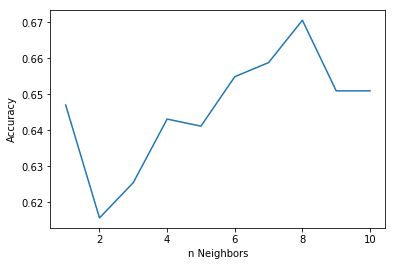

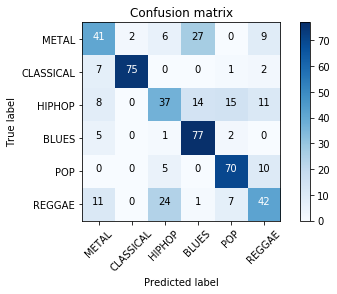

In [22]:
results_knn=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(numpy.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)
print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  

plot_cnf(knn,test_x,test_y,GENRES)

* Application of Random Forest algorithm and its performance analysis

Max Accuracy is 0.653 on test dataset with 19 estimators.

Training Score: 1.000
Test score: 0.653
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['hiphop' 'blues' 'reggae' 'blues' 'hiphop' 'classical' 'blues' 'hiphop'
 'reggae' 'blues' 'reggae' 'reggae' 'reggae' 'reggae' 'pop' 'pop' 'hiphop'
 'reggae' 'blues' 'pop' 'metal' 'metal' 'pop' 'classical' 'pop' 'classical'
 'metal' 'hiphop' 'classical' 'blues' 'metal' 'metal' 'reggae' 'reggae'
 'reggae' 'hiphop' 'reggae' 'classical' 'metal' 'hiphop' 'reggae' 'pop'
 'classical' 'classical' 'pop' 'metal' 'classical' 'reggae' 'classical'
 'blues' 'metal' 'metal' 'classical' 'pop' 'reggae' 'metal' 'metal' 'pop'
 'classical' 'metal' 'pop' 'blues' 'classical' 'blues' 'metal' 'metal'
 'hiphop' 'hiphop' 'reggae' 'blues' 'classical' 'reggae' 'classical'
 'reggae' 'metal' 'classical' 'hiphop' 'blues' 'metal' 'reggae' 'reggae'
 'blues' 'blues' 'hiphop' 'reggae' 'metal' 'blues' 'pop' 'blues' 'blues'
 'regga

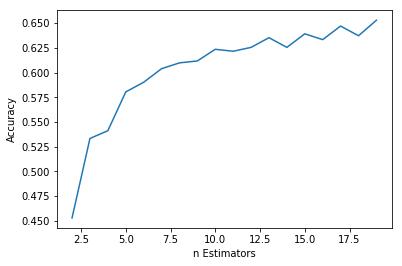

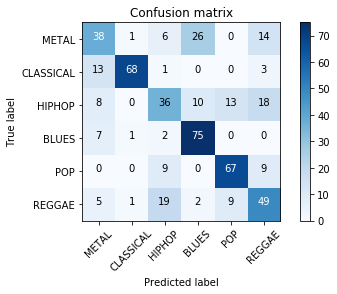

In [23]:
results_forest=[]
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(numpy.arange(2,20),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

plot_cnf(forest,test_x,test_y,GENRES)

* Application of SVM algorithm and its performance analysis

Training Score: 1.000
Test score: 0.700
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['hiphop' 'blues' 'reggae' 'blues' 'hiphop' 'classical' 'blues' 'hiphop'
 'reggae' 'blues' 'reggae' 'reggae' 'reggae' 'reggae' 'pop' 'pop' 'hiphop'
 'reggae' 'blues' 'pop' 'metal' 'metal' 'pop' 'classical' 'pop' 'classical'
 'metal' 'hiphop' 'classical' 'blues' 'metal' 'metal' 'reggae' 'reggae'
 'reggae' 'hiphop' 'reggae' 'classical' 'metal' 'hiphop' 'reggae' 'pop'
 'classical' 'classical' 'pop' 'metal' 'classical' 'reggae' 'classical'
 'blues' 'metal' 'metal' 'classical' 'pop' 'reggae' 'metal' 'metal' 'pop'
 'classical' 'metal' 'pop' 'blues' 'classical' 'blues' 'metal' 'metal'
 'hiphop' 'hiphop' 'reggae' 'blues' 'classical' 'reggae' 'classical'
 'reggae' 'metal' 'classical' 'hiphop' 'blues' 'metal' 'reggae' 'reggae'
 'blues' 'blues' 'hiphop' 'reggae' 'metal' 'blues' 'pop' 'blues' 'blues'
 'reggae' 'metal' 'classical' 'metal' 'blues' 'blues' 'pop' 'metal

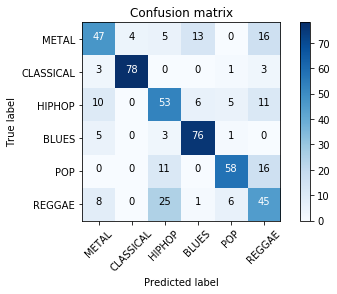

In [24]:
svm=SVC(C=100,gamma=0.08)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

plot_cnf(svm,test_x,test_y,GENRES)

* Application of KNN algorithm and its performance analysis

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Training Score: 1.000
Test score: 0.676
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['hiphop' 'blues' 'reggae' 'blues' 'hiphop' 'classical' 'blues' 'hiphop'
 'reggae' 'blues' 'reggae' 'reggae' 'reggae' 'reggae' 'pop' 'pop' 'hiphop'
 'reggae' 'blues' 'pop' 'metal' 'metal' 'pop' 'classical' 'pop' 'classical'
 'metal' 'hiphop' 'classical' 'blues' 'metal' 'metal' 'reggae' 'reggae'
 'reggae' 'hiphop' 'reggae' 'classical' 'metal' 'hiphop' 'reggae' 'pop'
 'classical' 'classical' 'pop' 'metal' 'classical' 'reggae' 'classical'
 'blues' 'metal' 'metal' 'classical' 'pop' 'reggae' 'metal' 'metal' 'pop'
 'classical' 'metal' 'pop' 'blues' 'classical' 'blues' 'metal' 'metal'
 'hiphop' 'hiphop' 'reggae' 'blues' 'classical' 'reggae' 'classical'
 'reggae' 'metal' 'classical' 'hiphop' 'blues' 'metal' 'reggae' 'reggae'
 'blues' 'blues' 'hiphop' 'reggae' 'metal' 'blues' 'pop' 'blues' 'blues'
 'reggae' 'metal' 'classical' 'metal' 'blues' 'blues' 'pop' 'metal

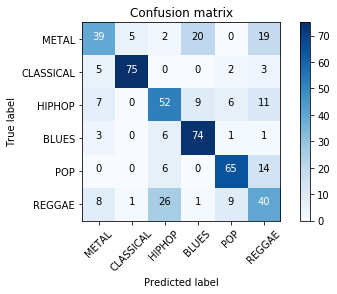

In [25]:
neural=MLPClassifier(max_iter=400,random_state=2,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))

plot_cnf(neural,test_x,test_y,GENRES)